# Course 1 - Neural Networks and Deep Learning
## Logistic reggression as a Neural Network
### Binary classification
Logistic reggression is an algorithm for binary classification, where the output goes from 0 to 1 for the probability of a certain class.<br>
For image classification we are going to unroll the RBG pixels in to a single vector with $n$ features that represent each pixel value. For e.g. in a 64x64 image we are going to have a 64x64x3 (12,288) feature vector.
#### Notation
- $(x_i,y_i)$ - Single value where $x \in {\Bbb R}^{n_x} , y \in \{0,1\}$ 
- $m$ - Number of trining examples; $\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)})\}$
- $m_{train}$ - Number of training examples
- $m_{test}$ - Number of test examples
- $X=\begin{bmatrix}| & | & ... & | \\ x^{(1)} & x^{(2)} & ... & x^{(m)} \\ | & | & ... & | \end{bmatrix}$ - $m$ number of training examples and $n_x$ number of features.
- $Y = \begin{bmatrix} y^{(1)} & y^{(2)} & ... & y^{(m)} \end{bmatrix}$ - Target vector.

### Logistic Regression
Given $x$ we want $\hat{y} = P(y=1|x)$, the parameters of the logistic reggresion will be $w \in {\Bbb R}^{n_x}$ and $b\in{\Bbb R}$.<br>
With this parameters we'll use the sigmoid function:
- $G(z) = \cfrac{1}{1+e^{-z}}$
<br>
- If $z$ is large then $G \approx 1$, if $z$ is small then $ G\approx0$
- $b$ corresponds to the intercept and $w$ is the vector parameter.

So in general, given $\{(x^{(1)},y^{(1)}),...,(x^{(m)},y^{(m)})\}$ the logistic regression model to estimate $\hat{y}^{(i)}\approx y^{(i)}$ is:

- $\hat{y} = \sigma(w^Tx + b)$, where $\sigma(z) = \cfrac{1}{1+e^{-z}}$

### Logistic regression cost function
One thing that we can do is to define the loss function as: $\ell(\hat{y},y) = \cfrac{1}{2}*(\hat{y}-y)^2$, but with this, the optimization problem becomes non convex with multiple local optima so gradient descent will not work.<br>
For logistic regression we'll use the following loss function for a single record that will generate a convex optimization problem:
- $\ell(\hat{y},y) = -(y\log\hat{y}+(1-y)\log(1-\hat{y})$

    - If $y=1 : \ell(\hat{y},y) = -\log\hat{y}$, we want $\log (\hat{y})$ small, want $\hat{y}$ large.<br>
<img src='img/img1.jpg' style="width:200px; height:150px"/>
    - If $y=0 : \ell(\hat{y},y) = -\log(1-\hat{y})$, we want $\log (1-\hat{y})$ small, want $\hat{y}$ small.<br>
<img src='img/img2.jpg' style="width:200px; height:150px"/><br><br>

For the entire dataset the **Cost function** is as following:
- $J(w,b) = = \cfrac{1}{m} \sum_{i=1}^{m} \ell(\hat{y}^{(i)},y^{(i)}) = -\cfrac{1}{m} \sum_{i=1}^{m}[y^{(i)}\log \hat{y}^{(i)} + (1-y^{(i)}) \log (1-\hat{y}^{(i)})]$

### Gradient Descent
To minimize $J(w,b)$ we can use the gradient descent algorithm that works as following:<br><br>
<img src='img/img3.jpg' style="width:300px; height:200px"/><br>
- Repeat {<br>
$dw = \cfrac{\partial J(w,b)}{\partial w}$<br>
$db = \cfrac{\partial J(w,b)}{\partial b}$<br>
$w = w - dw$<br>
$b = b - db$   }<br>

To perform partial derivatives we have to use the chain rule for derivatives, that means that for calculating $\cfrac{\partial J(w,b)}{\partial J(w)}$, we have to calculate the intermediate derivatives of the logisitic regression model and multiply them. Here are the solved partial derivatives in a vectorized implementation.

- $\cfrac{\partial J(w,b)}{\partial w} = \cfrac{1}{m} X(A-Y)^{T}$
- $\cfrac{\partial J(w,b)}{\partial b} = \cfrac{1}{m} \sum_{i=1}^{m}(a^{(i)} - y^{(i)})$

### Vectorization in Python
Here is a demonstration of the performance of vectorized algorithms vs for loops.

In [1]:
import numpy as np
import time
rands = np.random.RandomState(42)
a = rands.rand(1000)
rands = np.random.RandomState(69)
b = rands.rand(1000)
# For version
c=0
tic = time.time()
for i in range(1000):
    c+=a[i]*b[i]
toc = time.time()
print('For version: ',toc-tic,'ms', c)
# Vectorized version
tic = time.time()
c = np.dot(a,b)
toc = time.time()
print('Vectorized version: ',toc-tic,'ms', c)

For version:  0.0010008811950683594 ms 238.05301907559655
Vectorized version:  0.0010006427764892578 ms 238.05301907559658


### Broadcasting in python

In [2]:
# Broadcasting example for a (3,4) matrix division with a (1,4) matrix;
A = np.array([[50,0,4.4,86.8],
              [1.2,104,52,8.9],
              [1.8,135,0.99,0.9]])
print(A,'\n')
cal = A.sum(axis=0)
print(cal,'\n')
pntg = A*100/cal
print(pntg)

[[ 50.     0.     4.4   86.8 ]
 [  1.2  104.    52.     8.9 ]
 [  1.8  135.     0.99   0.9 ]] 

[ 53.   239.    57.39  96.6 ] 

[[94.33962264  0.          7.66684091 89.85507246]
 [ 2.26415094 43.51464435 90.60811988  9.21325052]
 [ 3.39622642 56.48535565  1.72503921  0.93167702]]


In [3]:
# Example of transposing and broadcasting;
a = np.random.randn(3,4)
b = np.random.randn(4,1)
c = np.zeros((3,4))
for i in range(3):
    for j in range(4):
        c[i][j] = a[i][j] + b[j]
print(c,'\n')
print(a + b.T)

[[-2.08503257 -0.85276594  0.90611041 -2.13006938]
 [-0.76890618  0.13393535 -2.23901305 -1.74981659]
 [-2.13324261 -1.29093937  0.50672521  0.06125876]] 

[[-2.08503257 -0.85276594  0.90611041 -2.13006938]
 [-0.76890618  0.13393535 -2.23901305 -1.74981659]
 [-2.13324261 -1.29093937  0.50672521  0.06125876]]


## Shallow Neural Network

### Neural Networks Overview
Like in logistic regression, neural networks are a chain of activation functions (e.g. sigmoid function) that forward propagates to calculate the global cost function and then bakcward propagates to calculate new parameters.
- Logistic regression model.<br>
<img src='img/img4.jpg' style="width:300px; height:200px"/><br>
- Neural network model.<br>
<img src='img/img5.jpg' style="width:600px; height:200px"/><br>

### Neural Network Representation.
This is an example of a 2 layer Neural Network where: $a^{[l]\leftarrow \text{layer}}_{i\leftarrow \text{node in layer}}$. <br>
<img src='img/img6.jpg' style="width:500px; height:370px"/><br>

### Computing a Neural Network's Output
- Calculation steps for logistic regression as a Neural Network.<br>
<img src='img/img7.jpg' style="width:250px; height:170px"/><br>
- Calculation steps for a single hidden layer Neural Network.<br>
<img src='img/img8.jpg' style="width:550px; height:170px"/><br>
    - Vectorized notation:<br><br>
    $z^{[1]} = \begin{bmatrix} - & w_{1}^{[1]T} & -  \\ - & w_{2}^{[1]T} & - \\ - & w_{3}^{[1]T} & - \\ - & w_{4}^{[1]T} & - \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} + \begin{bmatrix} b_{1}^{[1]} \\ b_{2}^{[1]} \\ b_{3}^{[1]} \\ b_{4}^{[1]}\end{bmatrix} = \begin{bmatrix} w_{1}^{[1]T}x + b_{1}^{[1]} \\  w_{2}^{[1]T}x + b_{2}^{[1]} \\  w_{3}^{[1]T}x +b_{3}^{[1]} \\ w_{4}^{[1]T}x + b_{4}^{[1]} \end{bmatrix} $ <br><br>
    $a^{[1]} = \sigma (z^{[1]})$<br>
    $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$<br>
    $a^{[2]} = \sigma (z^{[2]})$
    
### Vectorizing across multiple examples.
To calculate the $A^{[1]}$ and $A^{[2]}$ with a for loop, do:<br>
- For $i = 1$ to $m$:<br>
$z^{[1](i)} = W^{[1]}x^{(i)} + b^{[1]}$<br>
$a^{[1](i)} = \sigma (z^{[1](i)})$<br>
$z^{[2](i)} = W^{[2]}a^{[1](i)} + b^{[2]}$<br>
$a^{[2](i)} = \sigma (z^{[2](i)})$

### Explanation for a Vectorized Implementation
To implement forward propagation across multiple examples we can implement the following:<br><br>
$Z^{[1]} = \begin{bmatrix} - & w_{1}^{[1]} & -  \\ - & w_{2}^{[1]} & - \\ - & ... & - \\ - & w_{m}^{[1]} & - \end{bmatrix} \begin{bmatrix} | & | & | & | & | \\ x^{(1)} & x^{(2)} & x^{(3)} & ... & x^{(m)} \\ | & | & | & | & | \end{bmatrix} + \begin{bmatrix} b^{[1]}_{1} \\ b^{[1]}_{2} \\ b^{[1]}_{3} \\ ... \\ b^{[1]}_{m} \end{bmatrix}$<br>
$Z^{[1]} = \begin{bmatrix} | & | & | & | & | \\ z^{[1](1)} & z^{[1](2)} & z^{[1](3)} & ... & z^{[1](m)} \\ | & | & | & | & | \end{bmatrix}$<br><br>
With this, the final vetorized implementation looks like this:<br><br>
$Z^{[1]} = W^{[1]}X + b^{[1]}$; but $X = A^{[0]}$<br><br>
So, the complete vectorized implementation over the proposed neural network looks like this:<br><br>
$Z^{[1]} = W^{[1]}A^{[0]} + b^{[1]}$<br>
$A^{[1]} = \sigma (Z^{[1]})$<br>
$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$<br>
$A^{[2]} = \sigma (Z^{[2]})$; $\leftarrow (\hat{y})$

### Activation functions and their derivatives
- Sigmoid function $\rightarrow \sigma(z) = \cfrac{1}{1+\exp^{-z}} \rightarrow$ derivative: $\rightarrow \cfrac{1}{1+\exp^{-z}}\left( 1-\cfrac{1}{1+\exp^{-z}}\right)$<br>
<img src='img/img9.jpg' style="width:250px; height:150px"/><br>
- Hiperbolic tangent function $\rightarrow tanh(z) = \cfrac{\exp^{z}-\exp^{-z}}{\exp^{z}+\exp^{-z}}\rightarrow$ derivative: $\rightarrow 1 - (tanh(z))^{2}$<br>
<img src='img/img10.jpg' style="width:250px; height:150px"/><br>
- Rectified linear unit (ReLU) $\rightarrow max(0,z) \rightarrow$ derivative: $\rightarrow \big\{0 \text{ if } z<0 ; 1 \text{ if } z>0$<br>
<img src='img/img11.jpg' style="width:250px; height:150px"/><br>
- Leaking ReLU $\rightarrow max(0.1*z,z)\rightarrow$ derivative: $\rightarrow \big\{0.1 \text{ if } z<0 ; 1 \text{ if } z>0$<br>
<img src='img/img12.jpg' style="width:250px; height:150px"/><br>

#### Why do we need to use non-linear activation functions in the hidden layers?
If you use a linear activation function in the hidden layers, the following will happen:
- if $g(z) = z$
$a^{[1]} = z^{[1]} = w^{[1]}x + b^{[1]}$<br>
$a^{[2]} = w^{[2]}(w^{[1]}x + b^{[1]}) + b^{[2]}$<br>
$a^{[2]} = (w^{[2]}w^{[1]})x + (w^{[2]}b^{[1]}) + b^{[2]}$<br>
$a^{[2]} = w'x + b'$<br>

This linear function doesn't add any information in the hidden layers so might as well don't use a neural network. The only situation where you can use a linear activation function is for the output layer in a regression problem.

### Gradient descent for neural networks.
To implement gradient desent we need to calculate the partial derivatives across the entire network as following.<br>

<img src='img/img13.jpg' style="width:800px; height:150px"/><br>

- $dz^{[2]} = a^{[2]} - y$<br>
- $dW^{[2]} = dz^{[2]}a^{[1]T}$<br>
- $db^{[2]} = dz^{[2]}$<br>
- $dz^{[1]} = W^{[2]T} dz^{[2]} * g\prime^{[1]}(z^{[1]})$<br>
- $dW^{[1]} = dz^{[1]}x^{T}$<br>
- $db^{[1]} = dz^{[1]}$<br>

In vectorized implementation for the multiple records.

- $dZ^{[2]} = A^{[2]} - Y$<br>
- $dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T}$<br>
- $db^{[2]} = \frac{1}{m}np.sum(dZ^{[2]},axis=1,keepdims=True)$<br>
- $dZ^{[1]} = W^{[2]T}dZ^{[2]} * g\prime^{[1]}(Z^{[1]})$<br>
- $dW^{[1]} = \frac{1}{m}dZ^{[1]}X^{T}$<br>
- $db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]},axis=1,keepdims=True)$<br>

#### Ramdom initialization
To break simmetry (make the outputs of each activation node in the hidden layer different) we need to configure our initial parameters to random small numbers around 0. The initial parameters for $b$ can be 0.

## Deep Neural Network
### Deep L-layer neural network 
A deep learning NN is a multiple hidden layer neural network. A single hidden layer NN is known as a shallow NN.

<img src='img/img14.jpg' style="width:500px; height:250px"/><br>

We'll use the following notation:
- $L$; to denote the number of layers. The input layer is the "0" layer.
- $n^{[l]}$; to denote the number of units in layer "l".
- $a^{[l]}$; to thenote the number of activations in layer "l".

### Forward propagation in a Deep Network
Given a single training x, in general:

- $z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$
- $a^{[l]} = g^{[l]}(z^{[l]})$

For the whole data set in vectorized form:

- $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$; $A^{[0]} = X$
- $A^{[l]} = g^{[l]}(Z^{[l]})$

### Getting dimensions right
For the following deep neural network.

<img src='img/img15.jpg' style="width:300px; height:150px"/><br>

We have:
- $L=5$
- $n^{[0]}=2$; $n^{[1]}=3$; $n^{[2]}=5$; $n^{[3]}=4$; $n^{[4]}=2$; $n^{[5]}=1$

To validate dimesions for a single record:
- $z^{[l]} : (n^{[l]},1)$
- $W^{[l]} : (n^{[l]},n^{[l-1]})$
- $b^{[l]} : (n^{[l]},1)$
- $dW^{[l]} : (n^{[l]},n^{[l-1]})$
- $db^{[l]} : (n^{[l]},1)$
- $a^{[l]} : (n^{[l-1]},1)$

In a vectorized implementation for "m" records:
- $Z^{[l]} : (n^{[l]},m)$
- $W^{[l]} : (n^{[l]},n^{[l-1]})$
- $b^{[l]} : (n^{[l]},m)$
- $dW^{[l]} : (n^{[l]},n^{[l-1]})$
- $db^{[l]} : (n^{[l]},m)$
- $A^{[l]} \text{ or } X : (n^{[l-1]},m)$

### Why deep representations?
**Intuition about deep learning representation:**<br>
<img src='img/img16.jpg' style="width:500px; height:200px"/><br>

**Circuit theory and deep learning:** There are functions you can compute with a "small" L-layer deep neural network that shallower networks require exponentially more hidden units to compute.<br>

### Building blocks of deep neural networks
**Example of implementation of a neural network:**<br>
<img src='img/img17.jpg' style="width:400px; height:200px"/><br>
With this:<br>
$W^{[l]} = W^{[l]} - \alpha*dW^{[l]}$<br>
$b^{[l]} = b^{[l]} - \alpha*db^{[l]}$<br><br>
**Note:** We store the cache $Z^{[l]}$ in Forward propagation to use it later in Backward propagation.

### Forward and Backward Propagation
#### Forward propagation:
- Input $a^{[l-1]}$
- Output $a^{[l]}$, cache $z^{[l]}$<br>

Single record:<br>
$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$<br>
$a^{[l]} = g^{[l]}(z^{[l]})$<br>
Vectorized:<br>
$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$; $A^{[0]} = X$<br>
$A^{[l]} = g^{[l]}(Z^{[l]})$
#### Backward propagation:
- Input $da^{[l]}$
- Output $da^{[l-1]}$, $dW^{[l]}$,$db^{[l]}$<br>

Single record:<br>
$dz^{[l]} = da^{[l]}*g\prime^{[l]}z^{[l]}$<br>
$dW^{[l]} = dz^{[l]}a^{[l-1]}$<br>
$db^{[l]} = dz^{[l]}$<br>
$da^{[l-1]} = W^{[l]T}dz^{[l]}$<br><br>
Vectorized:<br>
$dZ^{[l]} = dA^{[l]}*g\prime^{[l]}(Z^{[l]})$<br>
$dW^{[l]} = \frac{1}{m} dZ^{[l]}A^{[l-1]T}$<br>
$db^{[l]} = \frac{1}{m} np.sum(dZ^{[l]},axis=1,keepdims=True)$<br>
$dA^{[l-1]} = W^{[l]T}dZ^{[l]}$<br>

### Parameters vs Hyperparameters
- **Parameters:** $W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}, W^{[3]}, b^{[3]}...$<br>
- **Hyperparamenters:**
    - Learning rate $\alpha$
    - Number of interations
    - Number of hidden layers L
    - Hidden units
    - Choice of activation function

### Summary
<img src='img/img18.jpg' style="width:600px; height:500px"/><br>

# Course 2 - Improving Deep Neural Networks
## Practical aspects of Deep Learning
### Setting up your ML application
#### Train / Dev / Test sets
Applied Machine Learning is a highly iterative process.<br>
<img src='img/img19.jpg' style="width:500px; height:200px"/><br>
For the different applications of ML intuitions in certain areas often do not transfer to other areas.<br>
To go quickly throught this iterative process we need to set the data in train/dev/test sets. In traditional ML the train/dev/test sets ratio is 60%/20%/20% but for big data, smaller sets for dev and test are considered best practices; 98%/1%/1%/ is a common choice.<br>
For **Mismatched train/test distributions**, where the training set and the test/dev sets come from different sources, we have to make sure that they come from the same distribution.
#### Bias and Variance
Trade-off of a classification model:

|Classification| High variance | High bias | High variance and bias | Low bias and variance|
|:-|:-:|:-:|:-:|:-:|
|Train Set Error| 1% | 15% | 15% | 0.5% |
|Dev Set Error| 11% | 16% | 30% | 1% |

#### Basic recipe for Machine Learning
|Problem| Possible Solution|
|:-|:-|
|High bias| Bigger network; Larger training set; Change the NN architecture|
|High Variance| More data; Regularization; Change the NN architecture |

### Regularizing Neural Networks
#### Regularization

**For logistic regression:**<br>
For $min J(w,b)$:<br><br>
$J(w,b) = \frac{1}{m} \sum^{m}_{i=1}(\hat{y}^{(i)},y^{(i)}) + \frac{\lambda}{2m}||w||^{2}_2$<br><br>
$L_2 \text{regularization}: ||w||^{2}_2 = \sum^{n_x}_{j=1}w^{2}_{j} = w^{T}w$<br><br>
$L_1 \text{regularization}: \frac{\lambda}{2m}\sum^{n_x}_{j=1}|w|_{j} = \frac{\lambda}{2m}||w||_l$; w will be sparse<br><br>
$\lambda = \text{regularization parameter}$<br><br>

**For Neural networks:**<br>
For $min J(w^{[1]},b^{[1]},...,w^{[L]},b^{[L]})$:<br><br>
$J = \frac{1}{m}\sum^{m}_{i=1}L(\hat{y}^{(i)},y^{(i)}) + \frac{\lambda}{2m}\sum^{L}_{l=1}||w^{[l]}||^{2}$<br><br>
$||w^{[l]}||^{2}_{F} = \sum^{n^{[l]}}_{i=1}\sum^{n^{[l-1]}}_{j=1}(w^{[l]}_{ij})^{2}$; **"Frobenius norm"**<br><br>
$dw^{[l]} = \text{(From Backprop)} + \frac{\lambda}{m} W^{[l]}$<br><br>
$W^{[l]} = W^{[l]} - \alpha dW^{[l]}$; "Weight decay"

#### Dropout regularization

It consists in randomly eliminate nodes in the network, as following:<br>
<img src='img/img20.jpg' style="width:300px; height:150px"/><br>

**Inverted dropout;** We can implement this regularization as follows:<br>
for layer 3:<br>
>d3 = np.random.rand(a3.shape[0],a3.shape[1])<keep_prob<br>
a3 = np.multiply(a3,d3)<br>
a3/= keep_prop<br>
*For test time we can't use drop out*<br>

#### Other regularization methods
- Increase the training data by transforming existing examples. For e.g:<br>
<img src='img/img21.jpg' style="width:300px; height:150px"/><br>
- Early stopping; stop the #of iterations to avoid overfitting.<br>
<img src='img/img22.jpg' style="width:300px; height:250px"/><br>


### Setting up your optimization problem
#### Normalizing inputs.
To optimize gradient descent it's necessary to normalize the features of the model. Here is an intuition.<br>

<img src='img/img23.jpg' style="width:500px; height:250px"/><br>

By setting every feature to zero mean and same variance we help the learning algorithm to run faster.

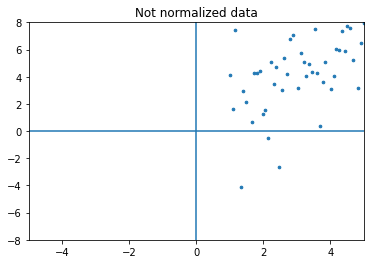

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,5,50)
y = 2 + x + 3*(np.random.randn(50))
plt.scatter(x,y,s=7)
plt.ylim(-8,8)
plt.xlim(-5,5)
plt.hlines(0,-5,5)
plt.vlines(0,-8,8)
plt.title('Not normalized data')
plt.show()

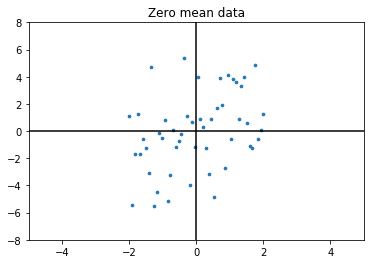

In [5]:
u,u2 =np.mean(x), np.mean(y)
plt.scatter(x-u,y-u2,s=7)
plt.ylim(-8,8)
plt.xlim(-5,5)
plt.hlines(0,-5,5)
plt.vlines(0,-8,8)
plt.title('Zero mean data')
plt.show()

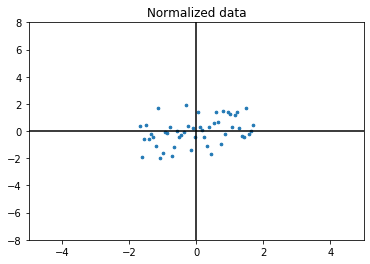

In [6]:
v,v2 =np.std(x), np.std(y)
plt.scatter((x-u)/v,(y-u2)/v2,s=7)
plt.ylim(-8,8)
plt.xlim(-5,5)
plt.hlines(0,-5,5)
plt.vlines(0,-8,8)
plt.title('Normalized data')
plt.show()

#### Vanishing / Exploding gradients
For certain deep architectures it's possible that the gradients increase/decrease exponentially for every layer that you add. Here's an intuition for a linesar NN.

<img src='img/img24.jpg' style="width:500px; height:80px"/><br>

$\hat{y} = W^{[L]} W^{[l-1]} W^{[l-2]} ... W^{[3]} W^{[2]} W^{[1]} X$<br>

Assuming W is an slightly bigger 2x2 identity matrix:

$\hat{y} = W^{[L]} \begin{bmatrix} 1.5 & 0 \\ 0 & 1.5 \end{bmatrix}^{L-1} X$<br>

For this configuration the gradients increase at a rate of: $1.5^{L}$
#### Weight initialization for Deep Networks

For a single neuron.<br><br>
<img src='img/img25.jpg' style="width:180px; height:110px"/><br>

$Z = W_1 X_1 + W_2 X_2 + ... W_n X_n$<br>
$\text{large } n \rightarrow \text{smaller } W_i$<br>
$\text{Var}(W_i) = \cfrac{2}{n}$<br>

For RELU:<br>
$W^{[l]} = \text{np.random.randn(shape)} \cdot \text{np.sqrt}\Big(\cfrac{2}{n^{[l-1]}}\Big)$

For tanh:<br>
$\sqrt{\frac{1}{n^{[-1]}}}$<br>

Xavier initialization:<br>
$\sqrt{\frac{2}{n^{[l-1]}+n^{[l]}}}$<br>

#### Numerical approximation of gradients
For a function: $f(\theta) = \theta^{3}$;<br>

$\cfrac{f(\theta+\epsilon)-f(\theta-\epsilon)}{2\epsilon} \approx g(\theta)$

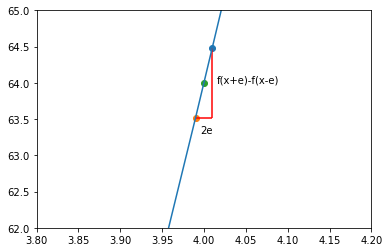

In [4]:
x = np.linspace(0,5,100)
y = np.power(x,3)
plt.scatter(4+0.01,(4+0.01)**3)
plt.scatter(4-0.01,(4-0.01)**3)
plt.scatter(4,(4)**3)
plt.plot(x,y)
plt.xlim(3.8,4.2)
plt.ylim(62,65)
plt.hlines((4-0.01)**3,4-0.01,4+0.01,colors='r')
plt.vlines(4+0.01,(4-0.01)**3,(4+0.01)**3,colors='r')
plt.annotate('2e',xy=(3.995,63.3))
plt.annotate('f(x+e)-f(x-e)',xy=(4.015,64))
plt.show()

#### Gradient checking
1. Take all parameters $W^{[1]},b^{[1]},...,W^{[L]},b^{[L]}$ and reshape into a big vector $\theta$.

2. Take all derivatives $dW^{[1]},db^{[1]},...,dW^{[L]},db^{[L]}$ and reshape into a big vector $d\theta$.

3. Question: is $d\theta$ the gradient of $J(\theta)$?

4. For each i:
    - $d\theta^{[i]}_{\text{approx}} = \cfrac{J(\theta_1, \theta_2,...,\theta_i + \epsilon,...) - J(\theta_1, \theta_2,...,\theta_i - \epsilon,...)}{2\epsilon}$
    
5. Is $d\theta_{\text{approx}} \approx d\theta$?;
    - Check: $\cfrac{||d\theta_{\text{approx}}-d\theta||_{2}}{||d\theta_{\text{approx}}||_2 + ||d\theta||_2} \approx 0 $

#### Gradient checking implementation notes
- Don't use in training - only debug
- If alogorithm fails grad check, look at components to try to identify bug.
- Remember regularization.
- Doesn't work with dropout
- Run at random intialization; perhaps again after some training.

## Optimization algorithms
### Mini-batch gradient descent
Vectorization allows you to efficiently compute on *m* examples.<br>
$X_{(n,m)} = [x^{[1]},x^{[2]},x^{[3]},...,x^{[m]}]$<br>
$Y_{(1,m)} = [y^{[1]},y^{[2]},y^{[3]},...,y^{[m]}]$<br>

What if $m=5000000$?; We can run gradient decent in mini batches of 1000 each.<br>
Minibatch t : $X^{\{t\}}, Y^{\{t\}}$<br>

**Implementation:**<br>
for t = 1,...,5000:<br>
   > Forward propagation on $X^{\{t\}}$:
        >> $Z^{[1]} = W^{[1]}X{\{t\}} + b^{[1]}$<br>
        $A^{[1]} = g^{[1]}(Z^{[1]})$<br>
        ...<br>
        $A^{[L]} = g^{[L]}(Z^{[L]})$<br>
        Compute cost $J^{[t]} = \frac{1}{1000} \sum^{l}_{i=1}L(\hat{y}^{(i)},y^{(i)})+ frac{\lambda}{2 \cdot 1000}\sum^{l}_{j=1}||w^{[l]}||^{2}_{F}$<br>
        Back propagation to comute gradients $J^{\{t\}} (\text{using}(X^{\{t\}},Y^{\{t\}}))$<br>
        $W^{[l]} = W^{[l]} - \alpha dW^{[l]}, b^{[l]} = b^{[l]} - \alpha db^{[l]}$

### Understanding mini-batch gradient descent

**Training Batch gradient descent**<br>
<img src='img/img26.jpg' style="width:250px; height:200px"/><br>

**Training mini-batch gradient descent**<br>
<img src='img/img27.jpg' style="width:250px; height:200px"/><br>

**Choosing mini-batch size:**<br>

If mini-batch size = m: Batch gradient descent. $(X^{\{t\}},Y^{\{t\}})=(X,Y)$<br>
If mini-batch size = 1: Stochastic gradient descent. $(X^{\{t\}},Y^{\{t\}}) = (X^{(1)},Y^{(1)})$<br>
In practice 1 < mini-batch size < m.

**Practical guidelines:**<br>
- If small training set: Use batch gradient descent $(m\leq2000)$. 
- Choose a power of 2 (because of how computer memory works); e.g.: $2^6,2^6,2^8...$.
- Make sure that the minibatch fits in CPU/GPU memory.

### Exponentially weighted averages

Formula: $V_t = \beta V_{t-1} (1-\beta)\theta_t$; for e.g.<br>
$\beta = 0.9$; Averaging the 10 previous 10 temperature.<br>
$\beta = 0.98$; Averaging 50 days.<br>
$\beta = 0.5$; Averaging 2 days.<br>

<img src='img/img28.jpg' style="width:350px; height:200px"/><br>

### Understanding exponentially weighted averages

For, $v_t = \beta v_{t-1} + (1 - \beta)\theta_{t}$<br>
$v_{100} = 0.9v_{99} + 0.1 \theta_{100}$<br>
$v_{99} = 0.9v_{98} + 0.1 \theta_{99}$<br>
$v_{98} = 0.9v_{97} + 0.1 \theta_{98}$<br>
...<br>

Combining this equations;<br>
$v_{100} = 0.1 \theta_{100} + 0.9(0.1\theta_{99} + 0.9v_{98})$<br>
$v_{100} = 0.1 \theta_{100} + 0.1 \cdot 0.9 \cdot \theta_{99} + 0.1 \cdot 0.9^2 \cdot \theta_{98} + 0.1 \cdot 0.9^3 \cdot \theta_{97} + ... $<br>

This corresponds to a exponentially decaying function. All the coefficients add up to $\approx 1.0$.<br>
Also; $0.9^{10} \approx 0.35 \approx \frac{1}{e}$. Because of  this: $(1-\epsilon)^{\frac{1}{\epsilon}} = \frac{1}{e}$ This averages aroud 50 periods of time.

**Implementing exponentially weighted averages**<br>
Initiallize:
>$v_{\theta} = 0$<br>
$v_{\theta} = \beta v + (1-\beta)\theta_1$<br>
$v_{\theta} = \beta v + (1-\beta)\theta_2$<br>
...<br>

So;<br>
- $v_\theta = 0$<br>
- repeat{
    - get next $\theta_t$<br>
    $v_\theta = \beta v_\theta + (1-\beta)\theta_t$<br>
    }<br>

### Bias correction
For the first periods of time, because there is not information about the previous days, this will happen (purple line).

<img src='img/img29.jpg' style="width:350px; height:200px"/><br>

To solve this, instead of taking $v_t$ we should take $\cfrac{v_t}{1-\beta^t}$.<br>
When $t=2: 1-\beta^t = 1-(0.98)^2 = 0.0396$<br>
$\cfrac{v_2}{0.0396} = \cfrac{0.0196\theta_1 + 0.02\theta_2}{0.0396}$<br>

This solves the problem for the initial periods.

### Gradient descent with momentum

The basic idea is to compute an exponentially weighted average of the gradients to update paramters. To implement this:<br>

On iteration $t$:<br>
>   Compute $dW,db$ on current mini-batch.<br>
>>    $v_{dW} = \beta v_{dW} + (1-\beta)dW$<br>
    $v_{db} = \beta v_{db} + (1-\beta)db$<br>
    $ W = W - \alpha v_{dW} ; b = b - \alpha v_{db}$<br>

This will take a more straight forward path towards the local/global minimum.

### RMSprop (Root Mean Square Propagation)

On iteration $t$:<br>
> Compute $dW,db$ on current mini-batch.<br>
>> $S_{dW} = \beta S_{dW} + (1-\beta)dW^2$<br>
$S_{db} = \beta S_{db} + (1-\beta)db^2$<br>
$ W = W - \alpha \cfrac{dW}{\sqrt{S_{dW}}} ; b = b - \alpha \cfrac{db}{\sqrt{S_{db}}}$

This will shrink the gradient steps in the direction that takes the bigger step.

### Adam optimization algorithm

Initiallize: $v_{dW}=0, S_{dW}=0,v_{db}=0, S_{db}=0$<br>

On interation $t$:<br>
> Compute $dW, db$ using current minibatch<br><br>
$v_{dW}=\beta_1 v_{dW}+(1-\beta_1)dW,v_{db}=\beta_1 v_{db}+(1-\beta_1)db$<br>
$S_{dW}=\beta_2 S_{dW}+(1-\beta_2)dW^2,S_{db}=\beta_2 S_{db}+(1-\beta_2)db^2$<br>
$v_{dW}^{\text{corrected}} = \cfrac{v_{dW}}{(1-\beta^t_1)},v_{db}^{\text{corrected}} = \cfrac{v_{db}}{(1-\beta^t_1)}$<br>
$S_{dW}^{\text{corrected}} = \cfrac{S_{dW}}{(1-\beta^t_2)},S_{db}^{\text{corrected}} = \cfrac{S_{db}}{(1-\beta^t_2)}$<br>
$W = W-\alpha \cfrac{v_{dW}^{\text{corrected}}}{\sqrt{S_{dW}^{\text{corrected}}}+\epsilon},b = b-\alpha \cfrac{v_{db}^{\text{corrected}}}{\sqrt{S_{db}^{\text{corrected}}}+\epsilon}$

**Recomended hyperparamter choice:**<br>
- $\alpha$: needs to be tuned.<br>
- $\beta_1$: 0.9 $(dW)$<br>
- $\beta_2$: 0.999 $(dW^2)$
- $\epsilon$: $10^{-8}$

### Learning rate decay
1 epoch = 1 pass through the data; with this:<br>
$\alpha = \cfrac{1}{1+(\text{decay rate} \cdot \text{# epoch})}$<br>
With this formula you have to tune 2 hyperparameters (alpha and decay rate).<br>

**Other methods:**<br>
- $\alpha = 0.95^{\text{#epoch}} \cdot \alpha$: Exponential decay.
- $\alpha = \cfrac{k}{\sqrt{\text{#epoch}}}\cdot \alpha$ or $\cfrac{k}{\sqrt{t}}\cdot \alpha$
- Discrete decay.
- Manual decay.

## Hyperparameter tuning, Batch Normalization and Programming Frameworks
### Hyperparamter tuning

Until now, we know the following hyperparamters.
- $\alpha$: Learning Rate.
- $\beta$: Momentum.
- $\beta_1, \beta_2, \epsilon$ : Hyperparameters for Adam optimization.
- Number of layers.
- Number of hidden units.
- Learning rate decay.
- Mini-batch size<br>

**Try random values: Don't use a grid**

<img src='img/img30.jpg' style="width:400px; height:150px"/><br>

#### Using an appropiate scale to pick hyperparameters

For certain hyperparameters it is ok to just use random values in a linear scale. For example the number of hidden layers in the network.<br>
For other hyperparameters you have to consider using a different scale. For example while tuning the learning rate, if you suspect that the optimum value is near 0.0001 and between 0.0001 and 1 you should try a log scale.
- Learning rate sampling in a random linear scale:

<img src='img/img31.jpg' style="width:350px; height:250px"/><br>
- Learning rate sampling in a random logaritmical scale:
    - $\alpha \rightarrow \text{ranges between } [0.0001,1]$<br>
    Set $\text{random} = \text{np.random.rand(n)}$, $\alpha = 10^{\text{random}}$.<br>
    <img src='img/img32.jpg' style="width:350px; height:250px"/><br>
- Beta sampling for exponentially weighted averages:
    - $\beta = 0.9 \rightarrow \text{sampling the last 10 values}$<br>
    $\beta = 0.999 \rightarrow \text{sampling the last 1000 values}$, So:<br>
    $1-\beta \rightarrow \text{ranges between } [0.1,0.001]$<br>
    Set $\text{random} = \text{np.random.uniform(-3,-1,n)}$, $\beta = 1 - 10^{\text{random}}$.<br>
    <img src='img/img33.jpg' style="width:350px; height:250px"/><br>
    
**For tunning the hyperparamters we can babysit a model, changing its hyperparameters while it runs or by training many models in parallel.(Pandas vs Caviar)**

### Batch normalization
#### Normalizing activations in a network
To speed up the optimization process, normalizing the inputs of the model is a common practice. For deep learning it is possible to normalize the activation nodes in the network.<br>
Given some intermediate values in a NN we are going to normalize $Z^{(1)},Z^{(2)},...,Z^{(m)}$.
- $\mu = \frac{1}{m} \sum_{i=1}^{m}Z^{(i)}$
- $\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(Z^{(i)} - \mu)^2$
- $Z^{(i)}_{\text{norm}} = \cfrac{Z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}}$
- $\tilde{Z}^{(i)} = \gamma Z^{(i)}_{\text{norm}} + \beta$<br>
$\beta \text{ and } \gamma$ are learnable parameters that allows to set the mean of Z.

#### Fitting Batch Normalization into a neural network
For the following neural network:<br>

<img src='img/img34.jpg' style="width:420px; height:140px"/><br>

$X \xrightarrow{W^{[1]},b^{[1]}} Z^{[1]} \xrightarrow{\beta^{[1]},\gamma^{[1]}} \tilde{Z}^{[1]} \xrightarrow{g^{[1]}} A^{[1]} \xrightarrow{W^{[2]},b^{[2]}} Z^{[2]} \xrightarrow{\beta^{[2]},\gamma^{[2]}} \tilde{Z}^{[2]} \xrightarrow{g^{[2]}} A^{[2]} ...$<br>

Parameters:
- $W^{[1]},b^{[1]},W^{[2]},b^{[2]},...,W^{[L]},b^{[L]}$
- $\beta^{[1]},\gamma^{[1]},\beta^{[2]},\gamma^{[2]},...,\beta^{[L]},\gamma^{[L]}$

#### Why does Batch normalization works
When you apply batch normalization, the values of the intermediate layers don't chage that much and you avoid the *Covariance shift*, this is because the mean and variance of the values in the network get estandarized.<br>
Batch normalization also has a regularization effect. While normalizing the mini-batch, you add some noise to the values of Z also adding a slight regularization effect as a side effect.

#### Batch Norm at test time
To compute the mean and variance of the to forward propagate at test time, you have to store a exponentially weighted average of them at train time across mini-batches.

### Muliti-class classification
#### Softmax Regression

For multi-class classification we need the final layer to output values representing the probability of each class.

<img src='img/img35.jpg' style="width:480px; height:140px"/><br>

In this final layer we'll compute:<br>
1. Compute the linear part of the layer: $Z^{[l]} = W^{[L]}a^{[L-1]} + b^{[L]}$
2. Compute the activation function:
    - $t=e^{(Z^{[L]})}$
    - $a^{[L]} = \cfrac{t}{\sum_{i=1}^{n}t_i}\rightarrow a_i^{[L]} = \cfrac{t_i}{\sum_{i=1}^{n}t_i}$
    
For example:
- $Z^{[L]} = \begin{bmatrix} 5\\2\\-1\\4 \end{bmatrix}$
- $t = \begin{bmatrix} e^5\\e^2\\e^{-1}\\e^3 \end{bmatrix} = \begin{bmatrix} 148.4\\7.4\\0.4\\20.1 \end{bmatrix}$
- $\sum_{i=1}^n t_i = 176.3$
- $a^{[L]} = \cfrac{t}{176.3} = \begin{bmatrix} 0.842\\0.042\\0.002\\0.114 \end{bmatrix}$

This method works with simple linear regressions with no hidden layers, here are some examples:

<img src='img/img36.jpg' style="width:450px; height:240px"/><br>

#### Training a softmax classifier
- Loss function $\rightarrow L(\hat{y},y)=-\sum_{i=1}^{c} y_i log\hat{y}_i$

- Cost of the entire set: $\frac{1}{m} \sum_{i=1}^mL(\hat{y}^{(i)},y^{(i)})$

- Gradient descent with softmax:
    - Backprop: $\cfrac{\partial J}{\partial Z^{[L]}} = dZ^{[L]} = \hat{y}-y$

### Tensorflow
**Implementation to find the minimum of**$J(w)=w^2-10w+25$

In [8]:
# Importaciones;
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
# Definición de variables;
coefficients = np.array([[1],[-10],[25]])
w = tf.Variable(0,dtype=tf.float32)
x = tf.placeholder(tf.float32,[3,1])
# cost = w**2 - 10*w + 25
cost = x[0][0]*w**2 + x[1][0]*w + x[2][0]
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
print(session.run(w))

0.0


In [10]:
session.run(train, feed_dict={x:coefficients})
print(session.run(w))

0.099999994


In [11]:
for i in range(1000):
    session.run(train, feed_dict={x:coefficients})
print(session.run(w))

4.999988


# Course 3 - Structuring Machine Learning Projects
## Introduction
In this part of the specialization we are going to check at a series of ML strategies to analize a problem, this to choose the most promizing way to optimize the model.
### Ortogonalization
This is the concept of designing the tuners of a ML model to just change one thing at a time so that it is easier to tune.<br>

**Chain of assumptions**<br>
- Fit training set well on cost function. (Tune with: Bigger network, Adam)
- Fit dev set well on cost function. (Tune with: Regularization, bigger train set)
- Fit test set well on cost function. (Tune with: Bigger dev set)
- Performs well in the real world. (Tune with: Go back and change the dev set or the cost function)

## Setting up your goal
### Single number evaluation metric
Rather than using multiple metrics for a model, you should pick one to easily evaluate the performance of multiple iterations of the model.

<img src='img/img37.jpg' style="width:450px; height:150px"/><br>
For example in this case where we have:
- Presicion:$\cfrac{\text{True Positive}}{\text{True positive }+\text{ False Positive}}$; % correct labels of all true labeled examples.
- Recall: $\cfrac{\text{True Positive}}{\text{True positive }+\text{ False Negatives}}$ % of examples of that are correctly labeled.<br>

Instead of using this you should use what is called:
- $F_1\text{Score} = \cfrac{2 \cdot PR}{P+R}$

### Satisficing and optimizing metric
Here is another example:<br>

<img src='img/img38.jpg' style="width:359px; height:100px"/><br>

In this case, both metrics are in different scales so we can say that.
- Accuracy is a Optimizing metric. We want to maximize it.
- Running time is a Satisficing metric. There is a min treshold.

### Train/dev/test distributions

We'll focus on to how to structure our development set (or holdout cross validation set) and test sets. Remember that the dev and test set must come from the same distribution.
In the modern era of deep learning, test and dev set can be around 1% given the fact that DL datasets are big (around 1MM).<br>
Consider that the metric could change depending on the business needs, let's say that a model's metric throws a high score but it lets through pornography. This is unacceptable, so one option is to raise the cost of a pornographic error.<br>
In general, if doing well on your metric + dev/test set does not correspond to doing well on your application, change your metric and/or dev/test set.

### Improving your model performance
Human level performance can work as a proxy to estimate Bayes Error (minimum possible error) for congnition problems (Computer vision, speech recognition, NPL, etc.)<br>

Human level<br>
$\Bigg\updownarrow\text{Avoidable bias}$<br>
Training error<br>
$\Bigg\updownarrow\text{Variance}$<br>
Dev Error

**Avoidable bias:**
- Train bigger model.
- Train longer/better optimization algorithms (momentum, RMSprop, ADAM).
- NN architecture/hyperparameters search.

**Variance:**
- More data.
- Regularization ($L_2$, dropout, data augmentation).
- NN Architecture/Hyperparameter search.

## Error Analysis
### Carrying out error analysis
It consists in manually looking at missclassified examples on the dev set searching for patterns in them. One way to evaluate multiple ideas for why the model is misclassifing things is to build the following table.<br>

|Image|Idea 1|Idea 2|Idea 3|Comments|
|:-:|:-:|:-:|:-:|:-:|
|1|ok|-|-|...|
|2|-|-|ok|...|
|3|-|ok|-|...|
|...|...|...|...|...|
|% of total|8%|43%|61%|...|

### Cleaning up incorrectly labeled data
- Apply the same process to your dev and test sets to make sure they continue to come from the same distribution.
- Consider examining examples your algorithm got right as well as ones it got wrong.
- Train and deb/test data may now come from slightlt different distrtibutions


## Mismatched training and dev/test sets
### Training and testing on different distributions
For real world deep learning applications, data can come from different distributions. For example in an online classifier you can have high quality images to train on (200,000) but you also have low resolution ones (10,000). With this we have 2 options:<br>

1. Option 1: Shuffle all images and build a train (205,000), dev (2,500) and test (2,500) set.
2. Option 2: Build your train (200,000 HQ and 5,000 Low Quality), dev (2,500 LQ) and test (2,500 LQ) set.

The second option is the optimal one because the actual application is going to process more LQ than HQ images. The only thing to keep in consideration is that the dev/test set must come from the same distribution.

### Bias and Variance with mismatched data distributions
When the training data and dev/test data come from different distributions, it is hard to tell if the algorithm is doing ok or not because our metric is evaluating in maybe a harder distrubution. To handle this we can create a new set for testing our model:
- Training-dev set: Same distribution as training set, but not used for training.

Human level<br>
$\Bigg\updownarrow\text{Avoidable bias}$<br>
Training set error<br>
$\Bigg\updownarrow\text{Variance}$<br>
Training-dev set error<br>
$\Bigg\updownarrow\text{Data mismatch}$<br>
Dev set error<br>
$\Bigg\updownarrow\text{Degree of overfitting to dev set}$<br>
Test set error<br>

### Addressing data mismatch
- Carry out manual error analysis to try to understand difference between training and dev/test sets.
- Make training data more similar, or collect more data similar to dev/test sets.

## Learning from multiple tasks
### Transfer Learning
One of the most powerful ideas in deep learning is that sometimes you can take knowledge the neural network has learned from one task and apply that knowledge to a separate task. This is called Transfer Learning.
The first step is to train a NN in a certain task and then delete the last output layer and it's weights to create a new layer for the new tas with new randomly inintialized weights.

<img src='img/img39.jpg' style="width:459px; height:140px"/><br>

Transfer Learning makes sense when:
- Task A and B have the same input x.
- You have a lot more data for Task A than Task B.
- Low level features from A could be helpful for learning B.

### Multi-task learning

In Multi-task learning you start simultaneously, trying to have one neural network do several things at the same time. And then each of those tasks helps hopefully all of the other task.

<img src='img/img40.jpg' style="width:459px; height:140px"/><br>

Loss: $\frac{1}{m} \sum^m_{i=1}\sum^4_{j=1} L(\hat{y}^{(i)}_j,y^{(i)}_j)$

Muti-task learning makes sense when:
- Trainning on a set of tasks that could benefit from having lower level features.
- Usually, amount of data you have for each task is quite similar.
- Can train a big enough neural network to do well on all the tasks.

## End to end deep learning
End to end Deep Learning takes multiple states of processing of a learning system and replaces them with usually just a single neural network. For example:<br>

**Speech recognintion example**<br>

- Normal way:<br>
$\text{audio}\xrightarrow{\text{mscc}}\text{features}\xrightarrow{\text{ml}}phonemes\rightarrow\text{words}\rightarrow\text{transcript} $<br>

- End to end Deep Learning:<br>
$\text{audio} \longrightarrow \text{transcript}$

**Pros**
- Lets the data speak.
- Less hand-designing of components needed.

**Cons:**
- May need large amount of data.
- Excludes potentially useful hand-designed components.

# Course 4 - Convolutional Neural Network
## Foundations of Convolutional Neural Networks
### Computer Vision
Computer Vision is one of the areas that's been advancing rapidly thanks to deep learning, you can also take ideas from CV and apply them on speech recognition and other tasks. Here are som application examples:

<img src='img/img41.jpg' style="width:720px; height:380px"/><br>

When you apply DL on images let say a 64x64x3 picture you end up with a 12,288 parameter first layer, and with a large image of 1000x1000x3 you end up with a 3 million parameter first layer. For the later let's say there are 1000 hidden units, with this you end up training on 3 billion parameters. With this many paramters it's difficult to get enough data to prevent a NN from overfitting and the computational and memory requirements are extremely high. To train on large images it's better to implement the convolution operation.

### Edge Detection Example

The earlier layers of a NN might detect edges and the later layers might detect larger objects like people's faces. Here we'll take a look at how to detect edges.
<br>

**Vertical Edge Detector:**

$\begin{bmatrix}
3 & 0 & 1 & 2 & 7 & 4 \\
1 & 5 & 8 & 9 & 3 & 1 \\
2 & 7 & 2 & 5 & 1 & 3 \\
0 & 1 & 3 & 1 & 7 & 8 \\
2 & 4 & 5 & 2 & 3 & 9 \\
\end{bmatrix}
* \begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}
= \begin{bmatrix}
-5 & -4 & 0 & 8 \\
-10 & -2 & 2 & 3 \\
0 & -2 & -4 & -7 \\
-3 & -2 & -3 & -16 \\
\end{bmatrix}$

Here we are appllying the convolution ($*$) operation, which multilplies the filter layer in every 3x3 space, for this example, of the 6x6 image ending up in a 4x4 image. Here is a simpler example:<br>

$\begin{bmatrix}
10 & 10 & 10 & 0 & 0 & 0 \\
10 & 10 & 10 & 0 & 0 & 0 \\
10 & 10 & 10 & 0 & 0 & 0 \\
10 & 10 & 10 & 0 & 0 & 0 \\
10 & 10 & 10 & 0 & 0 & 0 \\
\end{bmatrix}
* \begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}
= \begin{bmatrix}
0 & 30 & 30 & 0 \\
0 & 30 & 30 & 0 \\
0 & 30 & 30 & 0 \\
0 & 30 & 30 & 0 \\
\end{bmatrix}$

<img src='img/img42.jpg' style="width:300px; height:100px"/><br>

### More Edge Detection

Here we'll see the difference between positive and negative edges, that is, the difference between light to dark vs. dark to light transitions.

<img src='img/img43.jpg' style="width:600px; height:338px"/><br>

**Vertical filter**<br>

$\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}$<br>

**Horizontal filter**<br>

$\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1 \\
\end{bmatrix}$<br>

**Sobel Filter**

$\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\8
1 & 0 & -1 \\
\end{bmatrix}$<br>

**Scharr filter**

$\begin{bmatrix}
3 & 0 & -3 \\
10 & 0 & -10 \\
3 & 0 & -3 \\
\end{bmatrix}$<br>

**Deep learning filter**

$\begin{bmatrix}
w_1 & w_2 & w_3 \\
w_4 & w_5 & w_6 \\
w_7 & w_8 & w_9 \\
\end{bmatrix}$<br>

### Padding

The dimension of the output of a convolution operation is:<br>

$(n-f+1,n-f+1)$<br>

Where:
- n: dim of an image $(n,n)$
- f: dim of the filter $(f,f)$

Given this, every time that we do a convolution operation on an image, it will shrink and also we loose information from the edges of the image. The solution is to "pad" the image (by convention we use 0s) and with this we avoid shrinking the image. When we pad an image the new dimesions of the output are:<br>

$(n+2p-f+1,n+2p-f+1)$<br>

**Valid convolution**: Means no padding.<br>
**Same**: Pad so that output size is the same as the input size.  $(p=\frac{f-1}{2})$<br>

### Strided Convolutions

Strided convolution is another building block for convolutional NN. Let's say that we want to convolve this 7x7 image with a 3x3 filter, except that instead of doing it in the usual way, we are going to do it with a stride of two.

$\begin{bmatrix}
2 & 3 & 7 & 4 & 6 & 2 & 9 \\
6 & 6 & 9 & 8 & 7 & 4 & 3 \\
3 & 4 & 8 & 3 & 8 & 9 & 7 \\
7 & 8 & 3 & 6 & 6 & 3 & 4 \\
4 & 2 & 1 & 8 & 3 & 4 & 6 \\
3 & 2 & 4 & 1 & 9 & 8 & 3 \\
0 & 1 & 3 & 9 & 2 & 1 & 4 \\
\end{bmatrix}
* \begin{bmatrix}
3 & 4 & 4 \\
1 & 0 & 2 \\
-1 & 0 & 3 \\
\end{bmatrix}
= \begin{bmatrix}
91 & 100 & 83 \\
69 & 91 & 127 \\
44 & 72 & 74 \\
\end{bmatrix}$

With this:

- $(n,n) * (f,f) =\Bigg\lfloor\Bigg(\cfrac{n+2p-f}{s}+1,\cfrac{n+2p-f}{s}+1\bigg)\Bigg\rfloor$

- Where $ n = \text{image size}, f = \text{filter size}, s = \text{stride step}$.

**Technical note on cross-correlation vs. convolution**<br>
In math text book the convolution operation that we are doing, flips in both axes the filter before convolving. The actual operation that we are doing is named cross-correlation but for practical reasons and convention in the deep learning literature we are going to call it convolution.<br>
The objective of flipping the filter before convolving is to obtain the distributive property in the operation: $(A*B)*C = A*(B*C)$

### Convolutions Over Volume

Here we'll see how to implement convolutions over three dimensional volumes. Let start with an eample:

<img src='img/img44.jpg' style="width:600px; height:200px"/><br>

Here the entire volume of the filter will convolve over the 3 channel picture, but the result will be a two dimensional matrix. In the process of learning you can use multiple filters for the same image and learn their values at the same time so that they detect different specific characteristics of the picture.<br>
**Dimensions:**
$(n,n,n_c) * (f,f,n_c) = (n-f+1,n-f+1,n_f)$

### One Layer of a Convolutional Network

To build one layer of a convolutional NN, you have to do the following.

<img src='img/img45.jpg' style="width:800px; height:200px"/><br>

In this example we are using 2 filters, which is why we end up with our output 4 x 4 x 2. But if we, for example, instead of 2 we had 10, then we would have end up with a 4 x 4 x 10 dimensional output volume.<br>

**Summary of notation**<br>

- $f^{[l]}=\text{filter size}$
- $p^{[l]}=\text{padding}$
- $s^{[l]}=\text{stride}$
- $n_C^{[l]}=\text{number of filters}$
- $\text{Each filter is: }(f^{[l]},f^{[l]},n_C^{[l-1]})$
- $\text{Input: } (n_H^{[l-1]},n_W^{[l-1]},n_C^{[l-1]})$

- $\text{Relation between input and output: }(n_H^{[l]},n_W^{[l]}) = \Bigg\lfloor \Bigg( \cfrac{n_H^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}} + 1,\cfrac{n_W^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1\bigg)\Bigg\rfloor$
- $\text{Output: }(n_H^{[l]},n_W^{[l]},n_C^{[l]})$
- $\text{Activations: }a^{[l]}\rightarrow (n_H^{[l]},n_W^{[l]},n_C^{[l]})$
- $\text{Vectorized activations: }A^{[l]}\rightarrow (m,n_H^{[l]},n_W^{[l]},n_C^{[l]})$
- $\text{Weights: }(f^{[l]},f^{[l]},n_C^{[l-1]},n_f^{[l]})$
- $\text{Bias: }(1,1,1,n_C^{[l]})$

### Simple Convolutional Network

Now let's go through an exampleof a deep CNN. Let's say that we wanto to do image classification or image recognition.

<img src='img/img46.jpg' style="width:600px; height:400px"/><br>

**Types of layer in a convolutional network:**
- Convolution
- Pooling
- Fully connected

### Pooling Layers

Other tha convolutional layers, CNN use pooling layers to reduce the size of the representation to speed the computation, as well as make some of the features that detects a bit more robust. For example:

$\begin{bmatrix}
1 & 3 & 2 & 1 \\
2 & 9 & 1 & 1 \\
1 & 3 & 2 & 3 \\
5 & 6 & 1 & 2 \\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
9 & 2 \\
6 & 3 \\
\end{bmatrix}$

This is like having a $f=2$ and $s=2$. In max pooling there is nothing to learn by optimization, it is a fixed parametric operation. Here is another example.

$\begin{bmatrix}
1 & 3 & 2 & 1 & 3\\
2 & 9 & 1 & 1 & 5\\
1 & 3 & 2 & 3 & 2\\
8 & 3 & 5 & 1 & 0\\
5 & 6 & 1 & 2 & 9\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
9 & 9 & 5\\
9 & 9 & 5\\
8 & 6 & 9\\
\end{bmatrix}$

$f=3, s=1$

There is another type of pooling that is not used that often, Average Pooling instead of taking the maximum value in the filter, takes the average value.

### CNN Example

Let's look at this final example:

<img src='img/img47.jpg' style="width:600px; height:400px"/><br>

The last 3 layers are Fully Connected layers, they work in the same way as in regular Neural Networks. Here are the properties of the previous example:

**Corregir cuadro**

<img src='img/img48.jpg' style="width:600px; height:250px"/><br>

### Why Convolutions?

- **Parameter Sharing:** A feature detector (such as a vertical edge detector) that's useful in one part image is probably useful in another part of the image.

- **Sparsity of connections:** In each layer, each output value depends only on a small number of inputs.

## Deep convolutional models: Case studies

We're looking at some case studies because one characteristic of neural networks is that can you transfer the architecture of one constructed for a certain task to do another task and have good results. Here are some examples of NN architectures:

- LeNet-5
- AlexNet
- VGG
- ResNet
- Inception NN

### Classic Networks
**LeNet-5**<br>
<img src='img/img49.jpg' style="width:500px; height:170px"/><br><br>


**AlexNet**<br>
<img src='img/img50.jpg' style="width:500px; height:200px"/><br><br>


**VGG-16**<br>
<img src='img/img51.jpg' style="width:500px; height:250px"/><br><br>

### ResNets

Residual Networks consists in skip connections in the NN which allows to take the activation from one layer and suddenly feed it to another layer even much deeper in the nerural network. This enables to train very deep networks, sometimes over 100 layers.<br>

- Main path:
    - $a^{[l]} \rightarrow \text{Linear} \rightarrow \text{ReLU} \rightarrow a^{[l+1]} \rightarrow \text{ReLU} \rightarrow a^{[l+2]}$<br>
    - $z^{[l+1]} = W^{[l+1]}a^{[l]} + b^{[l+1]} \rightarrow a^{[l+1]} = g(z^{[l+1]}) \rightarrow z^{[l+2]} = W^{[l+2]}a^{[l+1]} + b^{[l+2]} \rightarrow a^{[l+2]} = g(z^{[l+2]})$<br>


- Residual net: 
    - $z^{[l+1]} = W^{[l+1]}a^{[l]} + b^{[l+1]} \rightarrow a^{[l+1]} = g(z^{[l+1]}) \rightarrow z^{[l+2]} = W^{[l+2]}a^{[l+1]} + b^{[l+2]} \rightarrow a^{[l+2]} = g(z^{[l+2]} + a^{[l]})$
    
In practice, when you train deep networks, the optimization algorithm gets a bigger training error than in shallower neural networks. What ResNets do, enables the training error to go down for deep networks:

<img src='img/img52.jpg' style="width:500px; height:350px"/><br><br>

#### Why ResNets Work

If we train our network deeper it can hurt our ability to do well on the training set. We'll use ResNets to avoid this problem, for example:

- Regular NN: $x \rightarrow \text{Big NN} \rightarrow a^{[l]}$
- ResNet: $x \rightarrow \text{Big NN} \rightarrow a^{[l]} \rightarrow \text{Residual Block} \rightarrow a^{[l + 2]}$

Let's say we are using a ReLU activation function so $a>0$.

- $a^{[l + 2]} = g(z^{[l+2]} + a^{[l]})$
- $a^{[l + 2]} = g(w^{[l+2]} a^{[l+1]} + b^{[l+2]} + a^{[l]}) = g(a^{[l]})$

So if $W^{[l+1]} = 0, b^{[l+2]} = 0$ then $a^{[l+2]} = a ^{[l]}$. Identity function is easier for ResNets to learn.

### Networks in Networks and 1x1 Convolutions
What does a 1x1 convolution do?.<br>

**For one channel:**<br>
$\begin{bmatrix}
1 & 2 & 3 & 6 & 5 & 8 \\
3 & 5 & 5 & 1 & 3 & 4 \\
2 & 1 & 3 & 4 & 9 & 3 \\
4 & 7 & 8 & 5 & 7 & 9 \\
1 & 5 & 3 & 7 & 4 & 8 \\
5 & 4 & 9 & 8 & 3 & 5 \\
\end{bmatrix}
*
2 = 
\begin{bmatrix}
2 & 4 & 6 & 12 & 10 & 16 \\
6 & 10 & 10 & 2 & 6 & 8 \\
4 & 2 & 6 & 8 & 18 & 6 \\
8 & 14 & 16 & 10 & 14 & 18 \\
2 & 10 & 6 & 14 & 8 & 16 \\
10 & 8 & 18 & 16 & 6 & 10 \\
\end{bmatrix}$<br>

**For multiple channels:**<br>

<img src='img/img53.jpg' style="width:300px; height:150px"/><br><br>

So, for multiple channels 1x1 convolutions work like a fully connected network across the channels of the image.

### Inception Networks

In an inception layer we can choose multiple methods in the same layer (convolutions, pooling layers or other filters).

<img src='img/img54.jpg' style="width:300px; height:150px"/><br>

The problem with this method is computational cost. For example in the following diagram, to compute the next layer you need to do $28,28,28 * 5,5,192 = 120 M.$ multiplications.

<img src='img/img55.jpg' style="width:300px; height:150px"/><br>

To solve this we can reduce the computational cost by using a 1x1 convolution layer.<br>
The inception module takes as input the activation of a previous layer, computes various methods of convolution or pooling and then it concatenates the output blocks. Here is a picture of an Inception Network.

<img src='img/img56.jpg' style="width:700px; height:300px"/><br>

## Practical advices for using ConvNets
### Using Open-Source Implementations
Whenever you can search for open source implementations in GitHub. 

### Transfer Learning
Rather than training the network from scratch, search for already trained weights to speed up your learning process. One option is to apply transfer learning and freeze some layers of the imported network to avoid training them and just train the last layers.

### Data Augmentation
For implementation of data Augmentation in large datasets, it is useful to load the data, transform it and train it in different CPU threads. Here we list some data augmentation methods:<br>

**Shape transformation:**

<img src='img/img57.jpg' style="width:500px; height:250px"/><br>

**Color shifting:**

There are different ways to sample R, G or B like PCA color augmentation (This method is explained in the AlexNet paper).

<img src='img/img58.jpg' style="width:375px; height:250px"/><br>

## Object Detection
### Object Localization
In order to learn about object detection we need to learn first about object localization. In image classification we can label an image into different classes, but in localization we draw a bounding box that indicates the position of the object that we are classifing.

<img src='img/img59.jpg' style="width:320px; height:150px"/><br>

In the terminology, the classification and localization usually has one object in a big picture to localize. In the detection problem we'll have multiple objects and classes.<br>

For the classification with localization we can have our CNN to ouput some coordinates for the bounding box.<br>

$y = \begin{bmatrix} \hat{y} \\ b_x \\ b_y \\ b_h \\ b_w \end{bmatrix}$<br>

where: 
$b_x = \text{x coordinate of the center point of the bounding box} \\
b_y = \text{y coordinate of the center point of the bounding box} \\
b_w = \text{Width of the bounding box} \\
b_h = \text{Height of the bounding box}$<br>

For this problem the Loss function will be:<br>

$L(\hat{y},y) = \Bigg\{ \begin{array} \\ \text{if } y = 1 & (\hat{y}_1 - y_1)^2 + (\hat{y}_2 - y_2)^2 + ... + (\hat{y}_n - y_n)^2 \\ \text{if } y = 0 &  (\hat{y}_1 - y_1)^2 \end{array}$

For the classification losses you can use sigmoid functions or softmax.

### Landmark Detection

In the same way we can tell a NN to point out the location of a bounding box, we can train it to spot landmarks. For example, augmented reality or pose detection.

### Object Detection

Here we'll learn how to use a CNN to perform object detection with the sliding windows detection algorithm. <br>
First we need to create a label training set so x and y are closely cropped examples of an object. With this training set we can train a CNN that inputs an image and then outputs zero or one.

<img src='img/img60.jpg' style="width:380px; height:270px"/><br>

We can use this CNN to implement the sliding windows detection algorithm by sliding a windos and applying the forward prop of the CNN to detect if there is a class in each stride of the window. After that, resize the window so you can detect multiple sizes.<br>
The disadvantage of this algorithm is the conputational cost and the problem with stride size. It works well with conventional Machine Learning methods.

### Convolutional Implementation of Sliding Windows

To build a convolutional implemetation of sliding windows, lets first how to convert fully connected layers into convolutional layers. For this we'll use multiple filters of the size of the final convollution

**Conventional FC layer:**<br>

<img src='img/img61.jpg' style="width:700px; height:150px"/><br>

**Convollutional FC layer:**<br>

<img src='img/img62.jpg' style="width:700px; height:150px"/><br>

With this we can implement the following,where each number in the last layer represents a prediction for stride.

<img src='img/img63.jpg' style="width:700px; height:150px"/><br>

### Bounding Box Predictions

The previous method we still have the problem of not being able to predict accurate bounding boxes. To improve this we'll implement the YOLO (You Only Look Once) algorithm.<br>

First, we'll place a grid into the image and we'll apply it to each of the grid cells.

<img src='img/img64.jpg' style="width:300px; height:300px"/><br>

The labels for training for each grid cell we'll be: <br>

$y = \begin{bmatrix} p_c \\ b_x \\ b_y \\ b_h \\ b_w \\ c_1 \\ c_2 \\ c_3 \end{bmatrix}$<br>

Where:
$p_c = \text{Probability of there being an image in the gridcell} \\
b_x = \text{x coordinate of the center point of the bounding box} \\
b_y = \text{y coordinate of the center point of the bounding box} \\
b_w = \text{Width of the bounding box} \\
b_h = \text{Height of the bounding box} \\
c_1 = \text{Probability of classifying the picture as class 1} \\
c_2 = \text{Probability of classifying the picture as class 2} \\
c_3 = \text{Probability of classifying the picture as class 3}$<br>

The algorithms assigns each detection to the gridcell containing the center of the identified object. To train this neural network we'll implement a regular ConvNet and then we should choose each layer so it maps into a $3x3x8$ for the image in the example.<br> 
To specify the bounding boxes for the gridcell well use the convention that for each gricell we'll consider its upper left corner as 0,0 coordinates. Each $b_x, b_y$ will be the relative position in the gridcell between 0 and 1.
**READ THE PAPER**

### Intersection Over Union

In the object detection task we have to localize the objecy too. The intersection over union we'll help us to choose between multiple detections for the same object.<br>

Intersection over Union: $\cfrac{\text{Size of intersetcion between detections}}{\text{Size of union between detections}}$<br>

By convention the localized object is the right one if the IoU is larger than 0.5.

<img src='img/img65.jpg' style="width:300px; height:300px"/><br>

In general, IoU is a measure of the overlap between two bounding boxes.

### Non-max Supression

One of the problems with object detection is that the algorithms could detect the same object multiple times. We'll use the Non-max supression technique so we detect each object just once.<br>
When running the YOLO algorithm we'll might end up with multiple detections for the same object, by evaluating the probability of each detection we'll supress the low prob ones so that we end up with just one detection per object. This is done by discarding any remaining box with an IoU > 0.5 with the maximum probability box in each gricell.
For multiple classes, it is necesary to run non max suppression for each class.

### Anchor Boxes

In we want to detect more than one object per gridcell we need to use Anchor Boxes. First predefine some anchor boxes so that we can associate one predictio per box.
For example, with two anchor boxes, each object in training image is assigned to a gridcell that contains object's midpoint and achor box for the grid cell with highest IoU.

<img src='img/img66.jpg' style="width:600px; height:500px"/><br>

### YOLO Algorithm

Here we'll put all previously seen methods to implement the YOLO object detection algorithm.

**Training:**

<img src='img/img67.jpg' style="width:600px; height:400px"/><br>

**Making predictions:**

<img src='img/img68.jpg' style="width:600px; height:300px"/><br>

**Non-Max Supression:**

- With two anchor boxes, we'll get 2 predicted bounding boxes.
- Get rid of low probability predictions.
- For each class use non-max supression to generate final predictions.


## Face Recognition
### What is face recognition?
**Verification:**
- Input image, Name/ID.
- Output whether the input image is that of the claimed person.

**Recognition:**
- Has a database of K persons.
- Get an input image.
- Output ID if the image is any of the K persons (or "not recognized")

### One Shot Learning

The one shot problem consists in being able to recognize a person given just one single image, or on example per person. To carry out this we need that our NN learns a "similarity" function:

- $d(\text{img1}, \text{img2}) = \text{degree of difference between images}$

If two images are of the same person, we want our function to output a small number. If all the comparisons output large numbers, the image is not in the database. 

### Siamese Network

To implement the similarity function we are going to use a Siamese Network. This consits in using a network to encode a picture as following.

<img src='img/img69.jpg' style="width:650px; height:270px"/><br>

The comparition between the output of different images encoded via this NN is the degree of difference between images.<br>

$d(x^{(1)},x^{(2)}) = ||f(x^{(1)}) - f(x^{(2)})||^{2}$

To train this network we want to learn parameters so that if:<br>
- $x^{(i)},x^{(j)} \text{ are the same person, } ||f(x^{(1)}) - f(x^{(2)})||^{2}\text{ is small.}$
- $x^{(i)},x^{(j)} \text{ are different persons, } ||f(x^{(1)}) - f(x^{(2)})||^{2}\text{ is large.}$

### Triplet Loss

One way to learn the parameters for the siamese network is to define gradient descend in a triplet loss function. To do this we need an anchor (A) picture and compare it to a Positive (P) and Negative (N) examples.

- We want: $d(A,P) = ||f(A) - f(P)||^{2} \leq d(A,N) = ||f(A) - f(N)||^{2}$

If we apply an optimization algorithm, the process will assign 0 to all parameters. To solve this:

- $||f(A) - f(P)||^{2} - ||f(A) - f(N)||^{2}  + \alpha \leq 0$

This alpha parameter pushes negative and positive results further away from each other.<br>
The triplet loss function is defined on triplets of images. Given 3 images (A,P and N):

- $L(A,P,N) = \text{max}(||f(A) - f(P)||^{2} - ||f(A) - f(N)||^{2}  + \alpha, 0)$

To train this system, we need multiple pictures of the same person so we have pairs of anchor and positive images. During training, if  A,P and N are chosen randomly, $d(A,P) + \alpha \leq d(A,N)$ is easily satisfied (Because there is a high probability we are going to train on very different pairs of persons). To solve this problem, we need to choose triplets that are hard to train on.

### Face Verification and Binary Classification

Another way to learn this parameters is to take the siamese network, compute the encoding of both and feed a logistic unit.

<img src='img/img70.jpg' style="width:650px; height:200px"/><br>

- $\hat{y} = \sigma (\sum^{128}_{k=1}w_k|f(x^{(i)})_k - f(x^{(j)})| +b)$, or<br>
- $\hat{y} = \sigma (\sum^{128}_{k=1}w_k\cfrac{(f(x^{(i)})_k - f(x^{(j)}))^2}{ f(x^{(i)})_k + f(x^{(j)})}+b)$

<img src='img/img71.jpg' style="width:300px; height:360px"/><br>

**More on the DeepFace paper**

## Neural Style Transfer
### What is Neural Style Transfer

Neural Style Transfer allows you to generate a new image but drawn in the style of other.

<img src='img/img72.jpg' style="width:650px; height:300px"/><br>

### What are deep CNN learning?

To find out what is a CNN is learning froma dataset, you should do the followin
 
<img src='img/img73.jpg' style="width:600px; height:270px"/><br>

For deeper layers, this are the patches that maximize the activations:

<img src='img/img74.jpg' style="width:600px; height:120px"/><br>

### Cost Funtion

In order to implement NST, we need to define a cost function to measure how good is a generated image.

**Content Cost:** $J(G) = \alpha J_{\text{content}}(C,G) + \beta J_{\text{style}}(S,G)$

The weights will determine the balance between the importance of the content and style images. In order to generate the image we need to do the following:

1. Initiate G randomly: $G:100,100,3$
2. Use gradient descent to minimize $J(G)$

### Content Cost Function

- Say you use a hidden layer $l$ to compute content cost. $l$ should be in between the network.
- Use a pre-trained CNN (Eg. VGG network)
- Let $a^{[l](C)}$ and $a^{[l](G)}$ be the activation of layer $l$ on the images.
- If $a^{[l](C)}$ and $a^{[l](G)}$ are similar, both images have similar content.
- $J_{\text{content}}(C,G) = ||a^{[l](C)} - a^{[l](G)}||^2$

### Style Cost Function

The style of an image is defined as tha correlation between activations across channels. This correlation tells us which high level texture components tend to occur or no toghether in different parts of an image.

<img src='img/img75.jpg' style="width:600px; height:250px"/><br>

**Style Matrix:**

- Let $a^{[l]}_{i,j,k} = \text{activation at } (i,j,k). G^{[l]} \text{is } n_c^{[l]} \text{x} n_c^{[l]}$

**Style cost function:**

- $J_{\text{style}}^{[l]}(S,G) = \cfrac{1}{(2n_H^{[l]}n_W^{[l]}n_C^{[l]})^2}\sum_k \sum_{k^{\prime}}(G_{k k^{\prime}}^{[l](S)} - G_{k k^{\prime}}^{[l](G)})^2$

**For all layers:**
- $J_{\text{style}}(S,G) = \sum_l \lambda^{[l]} J_{\text{style}}^{[l]}(S,G)$


# Course 5: Sequence Models
## Recurrent Neural Networks
### Why Sequence Models

Models like Recurrent Neural Networks have transformed speech recognition, natural language processing and other areas. This models can be usefull for the following applications.

- Speech recognition
- Music Generation
- Sentiment Classification
- DNA sequence analysis
- Machine translation
- Video activity Recognition
- Name entity recognition

### Notation

**Motivating example**<br>

$x:$ Harry Potter and Hermione Granger invented a new spell.<br>
$x: x^{<1>} x^{<2>} x^{<3>} ... x^{<9>}$; Tokenize each word<br>
$T_x = 9$; Length of input<br>
$y: 110110000$; Output<br>
$y: y^{<1>} y^{<2>} y^{<3>} ... y^{<9>}$; List of Outputs (following words)<br>
$T_y = 9$; Length of ouputs

**Representing Words**<br>

To represent words we must build a vocabulary based on a selected dictionary and assign a index for each word.

$x:$ Harry Potter and Hermione Granger invented a new spell.<br>
$x: x^{<1>} x^{<2>} x^{<3>} ... x^{<9>}$<br>

$\text{Dictionary} = \text{Vocabulary: } \begin{bmatrix} a \\ ... \\ arin \\ ... \\ and \\ ... \\ harry \\ ... \\ potter \\ ... \\ zulu \end{bmatrix} \begin{array} 11 \\ ... \\ 2 \\ ... \\ 367 \\ ... \\ 4075 \\ ... \\ 6830 \\ ... \\ 10000 \end{array}$<br><br>

With this you one hot encode the entire vocabulary for each word. <br>

$x^{<1>}= \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ ... \\ 1 \\ ... \\ 0 \\ 0 \\ 0 \end{bmatrix}$ ; and so on for all  $x^{<n>}$ variables.

### Recurrent Neural Network Model

**Why not a Standard Network:**

<img src='img/img76.jpg' style="width:400px; height:150px"/><br>

- Inputs, Outputs can be different lengths in different examples.
- Doesn't share features learned acorss different positions of text.

**Structure of a RNN:**

<img src='img/img77.jpg' style="width:400px; height:180px"/><br>

RRNs carry information between instances of training to detect patterns across a path or sequnces of information. 

<img src='img/img84.jpg' style="width:600px; height:270px"/><br>

$a^{<0>} = \overrightarrow{0}$<br>
$a^{<1>} = g(W_{aa} a^{<0>} + W_{ax} x^{<1>} + b_a)$ (g = tanh/RelU)<br>
$\hat{y}^{<1>} = g(W_{ya} a^{<1>}  + b_y)$ (g = sigmoid)<br>
$a^{<t>} = g(W_{aa} a^{<t-1>} + W_{ax} x^{<t>} + b_a)$<br>
$\hat{y}^{<t>} = g(W_{ya} a^{<t>}  + b_y)$

**Simplified RNN notation:**<br>

The following underlined term is the multiplication between the matrix $[W_{aa},W_{ax}]$ and the stack of the $a^{<t-1>}$ and $x^{<t>}$ matrices.

$a^{<t>} = g(\underline{W_a[a^{<t-1>} + x^{<t>}]} + b_a)$<br>

$W_a[a^{<t-1>} + x^{<t>}] = W_{aa} a^{<t-1>} + W_{ax} x^{<t>}$<br>

### Backpropagation through time

**Loss function:**<br>
Given the following loss function, to implemet backprop you shoud derivate across the entire computation graph. The algorithm is called Backpropagation through time.<br>

$L^{<t>}(\hat{y}^{<t>},y^{<t>})= -\hat{y}^{<t>}log\hat{y}^{<t>} - (1-y^{<t>}) log(1-y^{<t>})$<br>
$L(\hat{y},y) = \sum_{t=1}^{T_y} L^{<t>} (y^{<t>},y^{<t>})$

### Different types of RNNs

<img src='img/img78.jpg' style="width:600px; height:300px"/><br>

### Language model and sequence generation

Language modeling is one of the most basic and important tasks in natural language processing.

**What is language modelling:**

To implement a model that chooses between two different sentences with the same pronunciation by evaluating different probabilities. This is applied in speech recognition and machine translation. For eg.

- The apple and pair salad
- The apple and pear salad
- $P$(The apple and pair salad) $= 3.2 * 10^{-13}$
- $P$(The apple and pear salad) $= 5.7 * 10^{-10}$

**Language modelling with an RNN:**

- Training set: large corpus of english text.
- Tokenize each sentence, considering a token for the end of a sentence "< EOS >".
- If a particular word is not in the vocabulary you can tokenize it with a "< UNK >".

**RNN model:**

For the sentence: Cats average 15 hours of sleep a day.

<img src='img/img79.jpg' style="width:600px; height:250px"/><br>

### Sampling novel sequences

After you've train a sequence model, one of the ways you can informally get a sense of what is learned is to have a sample novel sequence. What you want to do is to sample what is the first word you want your model to generate, whith this you'll have a softmax distribution with chances for different words. Then you take this vector and randomly sample for the next word and pass it as input for the second position for the RNN.<br>
Dependieng on the application, you can also build a model where the vocabulary is the abecedary and simbols. This is called a character level language model.

<img src='img/img85.jpg' style="width:600px; height:250px"/><br>

### Gated Recurrent Unit (GRU)

For long sentences, normal RNN start to have problems because of long term dependencies of the language. This is a problem called Vanishing Gradients.
Here we'll learn about the Gated Recurrent Unit which is a modification to the RNN hidden layer that makes it much better capturing long range connections and helps a lot with the vanishing gradient problems

**GRU (simplified)**

- $C$: Memory cell
- $c^{<t>} = a^{<t>}$; for now they are equal
- $\tilde{c}^{<t>} = tanh(W_c[c^{<t-1>}, x^{<t>}] + b_c)$; Update function.
- Gate: $\Gamma_u = \sigma(W_u[c^{<t-1>}, x^{<t>}] + b_u)$; the function (0 or 1) of this gate is to decide whether to update or not the $\tilde{c}^{<t>} value$.
- $c^{<t>} = \Gamma_u * \tilde{c} + (1-\Gamma_u) * c^{<t-1>}$

**Full GRU**

- $\tilde{c}^{<t>} = tanh(W_c[\Gamma_r * c^{<t-1>}, x^{<t>}] + b_c)$
- $\Gamma_u = \sigma(W_u[c^{<t-1>}, x^{<t>}] + b_u)$
- $\Gamma_r = \sigma(W_r[c^{<t-1>}, x^{<t>}] + b_r)$
- $c^{<t>} = \Gamma_u * \tilde{c}^{<t>} + (1-\Gamma_u) * c^{<t-1>}$

### Long Short Term Memory

This is a slightly more powerful and general version of GRU.<br>

- $\tilde{c}^{<t>} = tanh(W_c[c^{<t-1>}, x^{<t>}] + b_c)$
- $\Gamma_u = \sigma(W_u[a^{<t-1>}, x^{<t>}] + b_u)$; update gate.
- $\Gamma_f = \sigma(W_f[a^{<t-1>}, x^{<t>}] + b_f)$; forget gate.
- $\Gamma_o = \sigma(W_o[a^{<t-1>}, x^{<t>}] + b_f)$; output gate.
- $c^{<t>} = \Gamma_u * \tilde{c}^{<t>} + \Gamma_f * c^{<t-1>}$
- $a^{<t>} = \Gamma_o * tanh(c^{<t>})$

Here is a diagram of one layer for the RNN with LSTM.<br>

<img src='img/img80.jpg' style="width:450px; height:330px"/><br>

This is how it looks when you connect multiple layers together.

<img src='img/img81.jpg' style="width:1000px; height:250px"/><br>

### Bidirectional RNN

For the following example, it would be necessary to have information about the future of the sequence to predict a consistent word. To solve this we'll implement a Bidirectiona RNN, this method works with LSTM or GRU blocks.

- He said, "Teddy bears are on sale!"
- He said, "Teddy Roosevelt was a great President!"

This method consists in adding to the forward propagation, a second stage that goes backward with differnt $a^{<t>}$ parameters but with the same inputs in reverse order.

<img src='img/img82.jpg' style="width:1000px; height:500px"/><br>

### Deep RNNs

To implement deep RNNs we need to add layer dimensions to our chanin of layer across the temporal dimension in the following way. We can also implement Bidirectional RNN with this configurations, although they are not used that much because of computational complexity.

<img src='img/img83.jpg' style="width:700px; height:350px"/><br>

## Natural Language Processing & Word Embeddings
### Introduction to Word Embeddings
#### Word Representation

All the previous discused ideas can be applied to NPL. Here we'll see how to work with word embeddings, which is a way to represent words and allows our algorithms to understand analogies.

So far we've been representing words using a one hot vector, one of the weakness is that it trats each word as an independent thing and doesn't let the algorithm to generalize. To achive this we will use a Featurized representation. For Eg.:

||Man (5391)|Woman (9853)|King (4914)|Queen (7157)|Apple (456)|Orange (6257)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Gender|-1.00|1.00|-0.95|0.97|0.00|0.01|
|Royal|0.01|0.02|0.93|0.95|-0.01|0.00|
|Age|0.03|0.02|0.7|0.69|0.03|-0.02|
|Food|0.04|0.01|0.02|0.01|0.95|0.97|

Word embeddings is basically learn high dimensional feature vectores like the ones on the table that give a better representation than one hot encoded vectors. They are not as interpretable as it is representedin the table.

#### Using Word Embeddings

To take this representations and plug them in into an NLP model it is convenient to apply transfer learning from an already trained network from a big database (1B text corpus).

1. Learn Word Embeddings from large text corpus (1-100B words). / Download pre-trained embedding online.
2. Transfer embedding to new task with smaller  training set. (~ 100K words).
3. Optional: Continue to finetune the word embeddings with new data.

#### Properties of word embeddings

If we want to identify an analogy in one of the computed vectors, we would do the following:

||Man (5391)|Woman (9853)|King (4914)|Queen (7157)|
|:-:|:-:|:-:|:-:|:-:|
|Gender|-1.00|1.00|-0.95|0.97|
|Royal|0.01|0.02|0.93|0.95|
|Age|0.03|0.02|0.7|0.69|
|Food|0.04|0.01|0.02|0.01|

- Man $\rightarrow$ Woman : $e_{\text{man}} - e_{\text{woman}} \approx \begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix}$
- King $\rightarrow$ Queen : $e_{\text{king}} - e_{\text{queen}} \approx \begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

The vector difference between two analogies is very similar. With this, if we want to find an analogy we should represent it as:

- $e_{\text{man}} - e_{\text{woman}} \approx e_{\text{king}} - e_?$ 
- Find word "W": $\text{argmax  } sim(e_w, e_{\text{king}} - e_{\text{queen}} + e_{\text{woman}})$

**Cosine Similarity**

$sim(e_w, e_{\text{king}} - e_{\text{queen}} + e_{\text{woman}})$<br>
$sim(u,v) = \cfrac{u^T v}{||u||_2||v||_2}$

#### Embedding matrix

When you implement an algorithm to learn a word embedding, what you end up learning is an embedding matrix.
To extract the information about a word, we must multiply our embedding matrix with the one hot encoded vector that corresponds to tha word on our vocabulary.

- E: Embedding Matrix (parameters, words)
- O: One hot evector of the selected word.
- $E \dot O = \text{embedding for word}$

**NOTE:** In practice, use specialized function to look up an embedding.

### Learning Word Embeddings: Word2vec & GloVe
#### Learning Word Embeddings

Here we'll learn som concrete algorithms for learning word embeddings.

**Neural language model**

Let's say we have the following sentence and we want to predict the last word. I want a glass of orange (?).<br>
First we create a One hot vector for the word and multpiply it by our embedding matrix to obtain an embedding vectors.

$\begin{matrix} 
\text{I} & O_{4343} & \rightarrow & E & \rightarrow & e_{4343} \\
\text{want} & O_{9665} & \rightarrow & E & \rightarrow & e_{9665} \\
\text{a} & O_{1} & \rightarrow & E & \rightarrow & e_{1} \\
\text{glass} & O_{3852} & \rightarrow & E & \rightarrow & e_{3852} \\
\text{of} & O_{6163} & \rightarrow & E & \rightarrow & e_{6163} \\
\text{orange} & O_{6257} & \rightarrow & E & \rightarrow & e_{6257} \\
\end{matrix}$

After this we will feed all this vectors stacked to a Neural Network with an output softmax unit to predict the following word.

**Other context/target pairs:**

For the followint sentence: I want a glass of orange <u>juice</u> to go along with my cereal. <br>
Context (input for the NN) could be:
- Last 4 words.
- 4 words on left and right.
- Last 1 word.
- Nearby 1 word. (Skip-gram)

#### Word2Vec

This algorithm is a simpler and computationally more efficient way to learn embeddings. For the following sentence:

- I want a glass of orange juice to go along with my cereal.
1. Pick a Context word randomly.
2. Pick a randomly distanced word as a target.

|Context|$\rightarrow$|Target|
|:-:|:-:|:-:|
|Orange||Juice|
|Orange||Glass|
|Orange||my|

**Model:**<br>
With this model we want to learn a mapping from some context "c" to a target "t".<br>

Vocab Size = 10,000K<br>

$O_c \rightarrow E \rightarrow e_c \rightarrow \text{softmax} \rightarrow \hat{y}$<br>

Softmax: $p(t|c) = \cfrac{e^{\theta^T_te_c}}{\sum^{10,000}_{j=1} e^{\theta^T_je_c}}$<br>

$L(\hat{y},y) = - \sum^{10,000}_{i=1} y_i log(\hat{y}_i)$

There are computational problems with this model because when we apply softmax we are applying a loop for the entire vocabulary. One solution is to implement a Hierarchical softmax unit.

#### Negative Sampling

This algorithm will help us to avoid the computational problems of the softmax unit previously discussed. We are going to do the following:

1. Pick a context word.
2. Pick a target word and label it with 1 for the first row.
3. Pick for random words from a dictionary and label them cero for the following "k" words.

|Context|$\rightarrow$|Word|$\rightarrow$|Target|
|:-:|:-:|:-:|:-:|:-:|
|Orange||Juice||1|
|Orange||King||0|
|Orange||book||0|
|Orange||the||0|
|Orange||of||0|

**Model:**

We are going to do the following:

$P(y=1|c,t) = \text{sigmoid}(\theta_t^Te_c)$

#### GloVe Word Vectors

The GloVe (global vectors for word representation) algorithm is another way to learn word embeddings.
For the following sentence: "I want a glass of orange juice to go along with my cereal". We are going to deffine the variable $X_{ij}$

$X_{ij}=$ # of times $i$ appears in context of $j$

**Model:**

- $f(X_{ij})$ is a weighting term to avoid infinity in the logarithm.
- $b_i$ equals "t"
- $b_j$ equals "c"

minimize $\sum_{i=1}^{10,000}\sum_{i=1}^{10,000}f(X_{ij})(\theta_i^Te_j + b_i + b_j - log(X_{ij}))$

### Applications using Word Embeddings
#### Sentiment Classification

One example of an application of sentiment clasification is business reviews and ratings:

<img src='img/img86.jpg' style="width:400px; height:180px"/><br>

**Simple sentiment classification model:**

For the following sentence: "The dessert is excellent". 

$\begin{matrix} 
\text{The} & O_{4343} & \rightarrow & E & \rightarrow & e_{4343} \\
\text{dessert} & O_{9665} & \rightarrow & E & \rightarrow & e_{9665} \\
\text{is} & O_{1} & \rightarrow & E & \rightarrow & e_{1} \\
\text{excellent} & O_{3852} & \rightarrow & E & \rightarrow & e_{3852} \\
\end{matrix}$

The we are going to average all vectors and pass it to a softmax to determine the rating of the review (1 to 5). 
One problem of this algorithm is that it ignores words order. For example, in the following sentence this algorithm could fail: "Completely lacking in good taste, good service and good ambience"

**RNN for setniment classificaition:**

We can use a many to one RNN to predict the ratings.

<img src='img/img87.jpg' style="width:600px; height:325px"/><br>


## Sequence models and Attention mechanism
### Various sequence to sequence architectures
#### Basic Models

Sequence to sequence models are useful for everything from machine translation to speech recognition. For example, the following sentece: 

- $\begin{matrix} \text{Jane} & \text{visite} & \text{l'Afrique} & \text{en} & \text{septembre.} \\ x^{<1>} & x^{<2>} & x^{<2>} & x^{<4>} & x^{<5>} \end{matrix}$

- $\begin{matrix} \text{Jane} & \text{is} & \text{visiting} & \text{Africa} & \text{in} & \text{September.} \\ y^{<1>} & y^{<2>} & y^{<2>} & y^{<4>} & y^{<5>} & y^{<6>} \end{matrix}$

To solve  this we could use a network like this:

<img src='img/img88.jpg' style="width:400px; height:150px"/><br>

**Image Captioning**

Other application of this is Image Captioning where we have an image and we want to output a caption that represents the image content. For eg. in the following sentence:

- $\begin{matrix} \text{A} & \text{Cat} & \text{sitting} & \text{on} & \text{a} & \text{chair} \\ x^{<1>} & x^{<2>} & x^{<2>} & x^{<4>} & x^{<5>} & x^{<6>} \end{matrix}$

<img src='img/img89.jpg' style="width:600px; height:225px"/><br>

#### Picking the most likely sentence

To determine which is the most accurate translation, we have to find a sentence that maximizes the followint probaility $argmax P( y^{<1>},..., y^{<T_y>}|x)$. The most common algorithm to do this is **Beam Search**

**Why not a greedy search?**

Greedy search consists in picking the most likely word for each output and feed it to the following instance. The problem with this approach is that the global probability for the entire translation can be higher for low probability predictions at the begging of the sentence, so what we want is to find the maximum global probability for the entire sentence.

#### Beam Search

In the first step of beam search we run the following network to get the following probability $P(y^{<1>}|x)$. The beam search algorithm has a parameter $B$ called beam width.<br>

**Step 1**

Choose the "B" most probable words in the softmax output.

1000 possible outputs >>> $\begin{bmatrix} \text{a} \\ ... \\ \text{in} \\ ... \\ \text{Jane} \\ ... \\ \text{September} \\ ... \\\text{zulu} \end{bmatrix}$ 

**Step 2**

Take each chosen "B" words, feed it to tha following time step to obtain the probability combination for a next word. $P(y^{<1>},y^{<2>}|x) = P(y^{<1>}|x)P(y^{<2>}| x, y^{<1>})$<br>
After this, we choose "B" words from all this output and we repeat until we finish the sentence.

**NOTE:** If B=1 beam search works in the same way as greedy search.

#### Refinements to Beam Search

**Length normalization**

This algorithm is a small change to the beam search algorithm that can help get better results.

$\text{argmax }\Pi^{T_y}_{t=1} P(y^{<t>}| x, y^{<1>}, ... , y^{<t-1>})$

This formula represents the computed probability for the beam search algorithm. The problem is that we end up with very small numbers and could lose information because of numerical underflow. So to avoid this, we do the following:

$\text{argmax }\sum^{T_y}_{t=1} log P(y^{<t>}| x, y^{<1>}, ... , y^{<t-1>})$

The problem with these formulas is that they prefer short sentences because of multiplying small numbers or adding negative numbers. To solve this we are going to do the following:

$\text{argmax  }\cfrac{1}{T^\alpha_y}\sum^{T_y}_{t=1} log P(y^{<t>}| x, y^{<1>}, ... , y^{<t-1>})$

Finally, to choose "B" we should take in consideration that the bigger "B" is, the more computational cost ther will be.

#### Error analysis in beam search

Beam search is an approximate search algorithm, also called a heuristic search algorithm so it doesn't always output the most likely sentence. Here we'll learn now to do error analysis in Beam Search.<br>
If we have the following sentence:

Jane visite l'Afrique en septembre.

- Human: Jane visits Africa in September. $y^*$
- Algorithm: Jane visited Africa last September. $\hat{y}$

For this:

- If $P(y^*|x) > P(\hat{y}|x)$ then Beam search is at fault.
- If $P(y^*|x) \leq P(\hat{y}|x)$ then the RNN is at fault.

#### Bleu Score

One challenge of machine translation is that one sentences could translate to multiple equally good answers. Fot this we are going to apply something called the Bleu (Bilingual Evaluation understudy) Score. For example:

French: Le chat est sur le tapis.

- Reference 1: The cat is on the mat.<br>
- Reference 2: There is a cat on the mat.

So as long as the predicted translation gets close to any of the references provided, it will get a high Bleu score. For example if the Machine translation is:

- MT Output: the the the the the the the the.

- Precision: $\frac{7}{7}$, meaning that 7 out of 7 words appear in the given reference. Bad metric.
- Modified precision: $\frac{2}{7}$ using each "the" in the reference just once.

**Bleu score on Unigrams:**

$P_1 = \cfrac{\sum_{\text{unigrams} \in \hat{y}} \text{Count}_\text{Clip}(\text{Unigram})}{\sum_{\text{unigrams} \in \hat{y}} \text{Count}(\text{Unigram})}$

In General:

$P_n = \cfrac{\sum_{\text{n-grams} \in \hat{y}} \text{Count}_\text{Clip}(\text{n-gram})}{\sum_{\text{n-grams} \in \hat{y}} \text{Count}(\text{n-gram})}$

**Bleu Details**

$p_n = \text{Bleu score on n-grams only}$<br>

Combined Bleu Score = $\text{BP} exp(\frac{1}{4}\sum^4_{n=1}p_n)$

BP = $\Bigg\{ \begin{matrix} \text{MT_output_length } > \text{reference_output_length} & 1 \\ \text{otherwise} & exp(1- \text{reference_output_length / MT_output_length} \end{matrix}$

#### Attention Model

The encoder-decoder arquitecture previously seem tends to lower on performance with sentence length. The attention model works looking at parts of sentences at a time to avoid this problem.<br>
To avoid this we are going to define a context "C" and a parameter "alpha" for weighting.

<img src='img/img90.jpg' style="width:700px; height:350px"/><br>

- $\alpha^{<t,\prime{t}>} =$ amount of "attention" $y^{<t>}$ should pay to $a^{<\prime{t}>}$.
- $\sum_{\prime{t}} \alpha^{<1,\prime{t}>} = 1$
- $C^{<1>} = \sum_{\prime{t}}\alpha^{<1,\prime{t}>} a^{<\prime{t}>}$

**Computing attention $\alpha^{<t,\prime{t}>}$**

$\alpha^{<t,\prime{t}>} = \cfrac{exp(e^{<t,\prime{t}>})}{\sum^{T_x}_{\prime{t}=1}exp(e^{<t,\prime{t}>})}$

To compute $e^{<t,\prime{t}>}$ we can use a FC layer network.

<img src='img/img91.jpg' style="width:700px; height:300px"/><br>
